# Data Exploration with Python

In [1]:
import numpy as np

**<h1>Question 1.</h1>** <br> Proposer un algorithme qui regroupe tous les nombres pairs du tableau à la partie
gauche du tableau. Il serait facile d’utiliser deux indices : un indice i qui pointe sur le nombre
impair le plus à gauche (en tenant compte de permutations qui ont déjà eu lieu) et un deuxième
indice j qui cherche le prochain nombre pair à déplacer. Quand i pointe sur un nombre impair et
j pointe sur un nombre pair, les deux éléments du tableau sont permutés. En d’autres termes, il
n’y a permutation que lorsque j pointe sur un nombre pair.

In [2]:
#Nous generons un tableau de 500 valeurs
tableau_nombre=[ x+1 for x in range(500)]
#Creation implicite du teabl
splitted_tableau=[]

In [3]:
# L'arlorightme parcours 
for key,value in enumerate(tableau_nombre):
    if(key%2 > 0):
        splitted_tableau.append([tableau_nombre[key],0])
    else:
        splitted_tableau.append([0,tableau_nombre[key]])

In [4]:
splitted_tableau[0:5]

[[0, 1], [2, 0], [0, 3], [4, 0], [0, 5]]

**<h1>Question 2. Soit la description des salaires des data scientistes suivante:</h1>**<br>
Column Description <br>
**work_year**: The year the salary was paid.<br>
**experience_level** : The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level /
Intermediate SE Senior-level / Expert EX Executive-level / Director<br>
**employment_type** :  The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance<br>
**job_title** : The role worked in during the year.<br>
**salary** : The total gross salary amount paid.<br>
**salary_currency** :  The currency of the salary paid as an ISO 4217 currency code.<br>
**employee_residence** :  Employee's primary country of residence in during the work year as an ISO 3166 country code.<br>
**remote_ratio** :  The overall amount of work done remotely, possible values are as follows: 0, No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)<br>
**company_location** :  The country of the employer's main office or contracting branch as an ISO 3166 country code.<br>
**company_size** :  The average number of people that worked for the company during the year: S / less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)<br>


**1. Décrire ce dataset (explications textuelles)**

Il s'agit d'un dataset qui nous donne le salaire moyen annuel des agents par pays, par origine des employés, par emploi type, par type de contrat, par taille d'entreprise, par mode de travail (télé travail ou presentiel) et par experience des employés

**2. Fusionner les trois fichiers de datasets (ds_salaries_2020.csv, ds_salaries_2021.csv
et ds_salaries_2022.csv).**

In [5]:
import pandas as pd

In [6]:
#Fusion à l'exportation

df_salaries=pd.concat(
    map(pd.read_csv,["Dataset/ds_salaries_2020.csv","Dataset/ds_salaries_2021.csv","Dataset/ds_salaries_2022.csv"]),ignore_index=True)


df_salaries.describe()

,Unnamed: 0,work_year,salary,remote_ratio
count,607.000000,607.000000,6.050000e+02,607.00000
mean,303.000000,2021.405272,3.248959e+05,70.92257
std,175.370085,0.692133,1.546831e+06,40.70913
min,0.000000,2020.000000,4.000000e+03,0.00000
25%,151.500000,2021.000000,7.000000e+04,50.00000
50%,303.000000,2022.000000,1.150000e+05,100.00000
75%,454.500000,2022.000000,1.650000e+05,100.00000
max,606.000000,2022.000000,3.040000e+07,100.00000


In [7]:
print("Les colonnes : ",df_salaries.columns)

Les colonnes :  Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


**3. Grouper les salaires par année, par job_title et par pays (afficher les salaires moyens comme agrégats).**

In [8]:
df_salaries_group_A=df_salaries.groupby(["work_year","job_title","company_location"])

In [9]:
df_salaries_group_A.mean("salary")["salary"]

work_year  job_title                 company_location
2020       AI Scientist              DK                  300000.0
           BI Data Analyst           US                       NaN
           Big Data Engineer         GB                   92500.0
                                     US                   70000.0
           Business Data Analyst     US                  117500.0
                                                           ...   
2022       Principal Data Analyst    CA                   75000.0
           Principal Data Scientist  DE                  148000.0
           Research Scientist        AT                   59000.0
                                     FR                   85000.0
                                     US                  132000.0
Name: salary, Length: 228, dtype: float64

**4. Obtenir les data analyst et les data engineer des USA et la France en 2022.**

In [10]:
df_salaries.query(" (job_title=='Data Scientist' or job_title=='Data Engineer') and (company_location=='US' or company_location=='FR') and work_year==2022 ")

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
289,289,2022,SE,FT,Data Engineer,135000.0,USD,US,100,US,M
292,292,2022,MI,FT,Data Scientist,130000.0,USD,US,0,US,M
293,293,2022,MI,FT,Data Scientist,90000.0,USD,US,0,US,M
294,294,2022,MI,FT,Data Engineer,170000.0,USD,US,100,US,M
295,295,2022,MI,FT,Data Engineer,150000.0,USD,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
596,596,2022,SE,FT,Data Scientist,210000.0,USD,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000.0,USD,US,100,US,M
599,599,2022,MI,FT,Data Scientist,130000.0,USD,US,100,US,M
602,602,2022,SE,FT,Data Engineer,154000.0,USD,US,100,US,M


**5. Numériser les données non numériques du dataset.**

In [11]:
columns_non_numeric=[]
for k, v  in zip (df_salaries.columns, df_salaries.dtypes):
    if v=="object":
        columns_non_numeric.append(k)

columns_non_numeric

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [12]:
#Les données non numerique sont soit null, soit na 
#Nous importons la librairie OneHotEncoder
from  sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()
df_salaries_numerical=df_salaries[["work_year","salary"]]
df_salaries_categorical=df_salaries[["experience_level","employment_type","job_title","salary_currency","employee_residence","company_location","company_size"]]
data_encoded=enc.fit_transform(df_salaries_categorical.fillna("Missing"))

df_salaries_categorical_encoded=pd.DataFrame(data_encoded,columns=columns_non_numeric)

df_salaries_fully_encoded=pd.concat((df_salaries_numerical,df_salaries_categorical_encoded),axis=1)
df_salaries_fully_encoded

,work_year,salary,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,2020,70000.0,2.0,2.0,22.0,7.0,14.0,12.0,0.0
1,2020,260000.0,4.0,2.0,41.0,16.0,32.0,29.0,2.0
2,2020,85000.0,4.0,2.0,7.0,8.0,20.0,18.0,1.0
3,2020,20000.0,2.0,2.0,48.0,16.0,23.0,20.0,2.0
4,2020,150000.0,4.0,2.0,38.0,16.0,56.0,49.0,0.0
...,...,...,...,...,...,...,...,...,...
602,2022,154000.0,4.0,2.0,17.0,16.0,56.0,49.0,1.0
603,2022,126000.0,4.0,2.0,17.0,16.0,56.0,49.0,1.0
604,2022,129000.0,4.0,2.0,12.0,16.0,56.0,49.0,1.0
605,2022,150000.0,4.0,2.0,12.0,16.0,56.0,49.0,1.0


**6. Visualiser l'histogramme de chaque colonne de ce dataset.**

In [13]:
#df_salaries_fully_encoded=df_salaries_fully_encoded.dropna()
df_salaries_fully_encoded.work_year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
602    2022
603    2022
604    2022
605    2022
606    2022
Name: work_year, Length: 607, dtype: int64

In [14]:
sorted(df_salaries_fully_encoded.experience_level.unique())

[0.0, 1.0, 2.0, 3.0, 4.0]

array([[<AxesSubplot:title={'center':'work_year'}>,
        <AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'experience_level'}>],
       [<AxesSubplot:title={'center':'employment_type'}>,
        <AxesSubplot:title={'center':'job_title'}>,
        <AxesSubplot:title={'center':'salary_currency'}>],
       [<AxesSubplot:title={'center':'employee_residence'}>,
        <AxesSubplot:title={'center':'company_location'}>,
        <AxesSubplot:title={'center':'company_size'}>]], dtype=object)

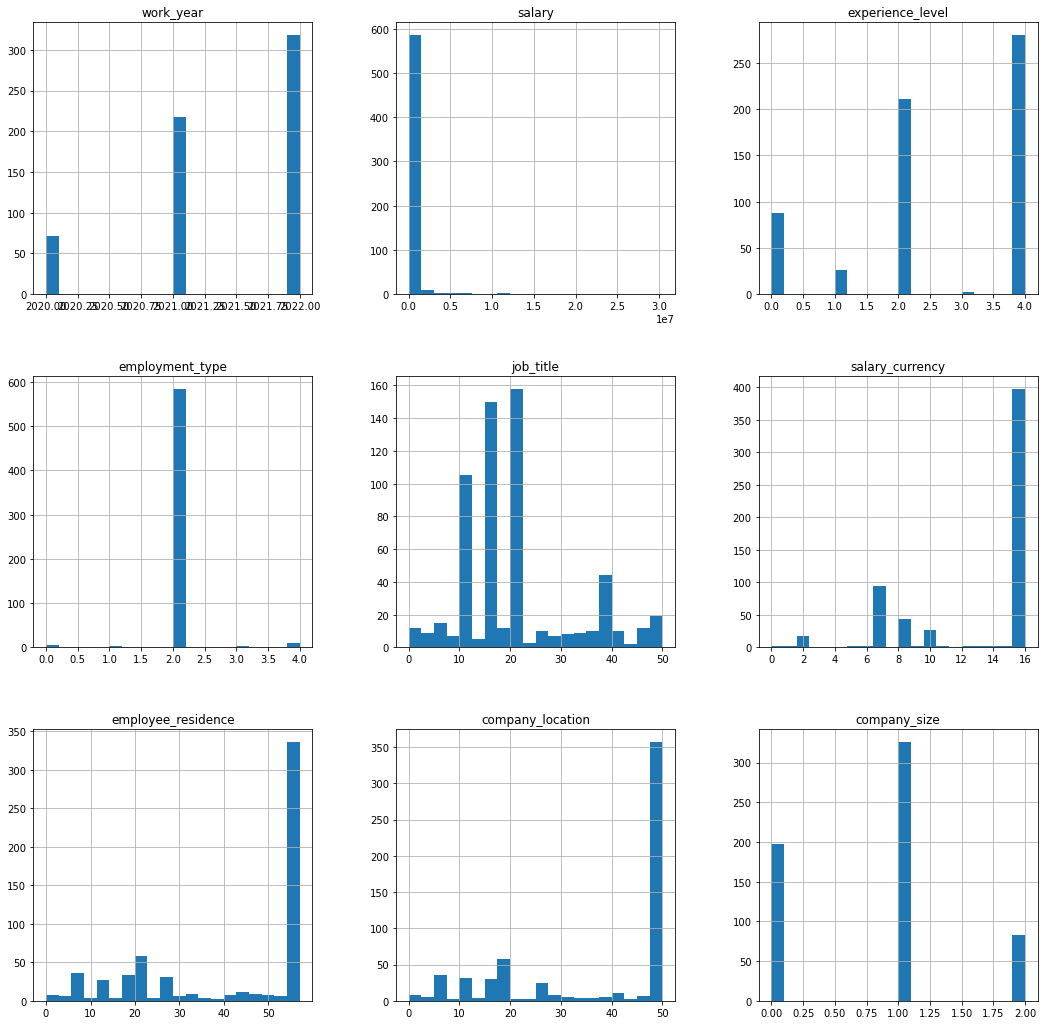

In [15]:
df_salaries_fully_encoded.hist(bins=20, figsize=(18,18))

**7. Pour chaque colonne, déterminer la moyenne, la médiane et le mode. Expliquer les
valeurs trouvées. Pour de valeurs nominales, ces caractéristiques statistiques doivent
aussi être nominales.**

In [16]:
from statistics import mean,mode,median


a. Work Pay

In [17]:
df_salaries.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [18]:
print(" La moyenne de ",mean(df_salaries.work_year) ," traduit qu'il asymetrie des données vers les années superieures à 2021")

 La moyenne de  2021.4052718286655  traduit qu'il asymetrie des données vers les années superieures à 2021


In [19]:
print(" La moyenne de ",median(df_salaries.work_year)," traduit qu'il asymetrie des données vers les années superieures à 2021")


 La moyenne de  2022  traduit qu'il asymetrie des données vers les années superieures à 2021


In [20]:
mode(df_salaries.work_year)

2022

**8. Déterminer s'il y a des valeurs manquantes et les remplacer par la moyenne de chaque
colonne concernée.**

In [21]:
df_salaries_fully_encoded.isna().sum()

work_year             0
salary                2
experience_level      0
employment_type       0
job_title             0
salary_currency       0
employee_residence    0
company_location      0
company_size          0
dtype: int64

La colonne "Salary" a 2 valeurs manquantes, ainsi nous allons proceder au remplaisnant par la moyen

In [22]:
#Localiser les cellules avec NaN
df_salaries_fully_encoded.salary[df_salaries_fully_encoded.salary.isna()>0]

15   NaN
23   NaN
Name: salary, dtype: float64

In [23]:
moyenne_salaire=df_salaries_fully_encoded.salary.mean()
df_salaries_fully_encoded.salary.fillna(moyenne_salaire,inplace = True)


In [24]:
#Verification du remplacement des valeurs NaN
df_salaries_fully_encoded.salary[df_salaries_fully_encoded.salary.isna()>0]

Series([], Name: salary, dtype: float64)

**9. Créer une nouvelle colonne salary_in_usd où tous les salaires seront convertis en dollars
américains et enregistrer le nouveau dataset sous ds_dataset_new.csv.**

In [25]:
#Preparaton des parités
parite_usd={'EUR-USD':0.98, 
            'GBP-USD': 1.11, 
            'HUF-USD':0.0023, 
            'INR-USD': 0.012, 
            'JPY-USD': 0.0069, 
            'CNY-USD': 0.14,
            'CAD-USD': 0.72,
            'DKK-USD': 0.13,
            'PLN-USD': 0.20,
            'SGD-USD': 0.70,
            'CLP-USD': 0.0010,
            'BRL-USD': 0.18,
            'TRY-USD': 0.054,
            'AUD-USD': 0.64,
            'CHF-USD': 1.01,
            'MXN-USD': 0.050}
parite_currency_numeric={code:currency for currency,code  in zip(df_salaries.salary_currency, df_salaries_fully_encoded.salary_currency)}


In [26]:
np_salary_in_usd=[]
for salary,currency in zip(df_salaries_fully_encoded.salary, df_salaries_fully_encoded.salary_currency) :
    actual_currency=parite_currency_numeric[currency]
    if(actual_currency=='USD') : #Cas du USD
        np_salary_in_usd.append(salary)
    else :
        #recuperation de la parité
        
        np_salary_in_usd.append(np.round(salary*parite_usd[str(actual_currency)+'-USD']))


In [27]:
ds_salary_in_usd=pd.DataFrame(np_salary_in_usd,columns=["salary_in_usd"])

In [28]:
ds_salary_new=pd.concat([df_salaries_fully_encoded,ds_salary_in_usd],axis=1)

In [29]:
ds_salary_new.to_csv("ds_dataset_new.csv")

**10. Créer une autre colonne salary_category pour (high pour salaire au dessus du ¾ du plus grand
salaire dans le dataset, normal entre ½ et ¾ et low en dessous de ½ ). Considérer la colonne
salary_in_usd pour cette question.**

In [30]:
highest_salary=int(ds_salary_new.salary_in_usd.max())
condition=[
    (ds_salary_new["salary_in_usd"]/highest_salary)>(3/4),
    ((ds_salary_new["salary_in_usd"]/highest_salary)<=(3/4)) & ((ds_salary_new["salary_in_usd"]/highest_salary)>=(1/2)),
    (ds_salary_new["salary_in_usd"]/highest_salary)<(1/2)
            ]

values_to_fill=['high','normal','low']

ds_salary_new["salary_category"]=np.select(condition,values_to_fill)

**11. Décrire les caractéristiques de chaque groupe de salaire selon la question 10**

In [31]:
ds_salary_new.salary_category.describe()

count     607
unique      3
top       low
freq      595
Name: salary_category, dtype: object

In [32]:
np_category_weight= ds_salary_new.salary_category.value_counts()
total_case=ds_salary_new.salary_category.count()

In [33]:
for key,value in enumerate(np_category_weight):
    print("Les salaires sont reparti à ",round(((np_category_weight[key]/total_case)*100),1)," % dans la categorie ",np_category_weight.keys()[key])

Les salaires sont reparti à  98.0  % dans la categorie  low
Les salaires sont reparti à  1.8  % dans la categorie  normal
Les salaires sont reparti à  0.2  % dans la categorie  high


**12. Supprimer les colonnes moins importantes.**

In [34]:
import plotly.express as px
from sklearn.decomposition import PCA


In [44]:
# Pour supprimer les colonnes moins importantes, nous avons utiliser la methode des ACP car les variables sont non corrélées
# Nous avons reduit les variables à un maximum de 3 permettant ainsi de poursuivre avec la representation
X = ds_salary_new[['work_year', 'salary', 'experience_level', 'employment_type',
       'job_title', 'salary_currency', 'employee_residence',
       'company_location', 'company_size', 'salary_in_usd']]
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

In [46]:
components

array([[-2.54714013e+05, -4.25407231e+04,  3.03777156e+01],
       [-6.55450376e+04,  1.49680658e+05,  3.79181216e+01],
       [-2.39825716e+05, -1.67259764e+04,  2.40124192e+01],
       ...,
       [-1.95976250e+05,  1.81143360e+04, -1.75232383e+01],
       [-1.75067430e+05,  3.92051212e+04, -1.41767943e+01],
       [-1.25284524e+05,  8.94212727e+04,  1.36967978e+01]])

**13. Visualiser en clusters ces données sur 3D**

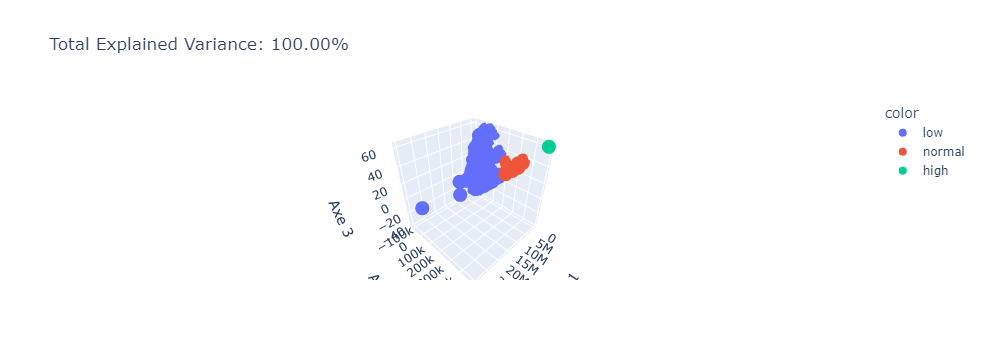

In [47]:
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=ds_salary_new['salary_category'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'Axe 1', '1': 'Axe 2', '2': 'Axe 3'}
)
fig.show()

**14. Identifier les colonnes les plus corrélées. Commenter!**

In [172]:
#Do after deletion of less important feature
ds_salary_new_important.corr()

,work_year,experience_level,employment_type,job_title,company_location,salary_in_usd
work_year,1.000000,0.309433,-0.047712,-0.172249,0.180136,0.153284
experience_level,0.309433,1.000000,-0.100027,0.011577,0.275855,0.335030
employment_type,-0.047712,-0.100027,1.000000,-0.093235,-0.096390,-0.133320
job_title,-0.172249,0.011577,-0.093235,1.000000,-0.142934,0.099667
company_location,0.180136,0.275855,-0.096390,-0.142934,1.000000,0.467503
salary_in_usd,0.153284,0.335030,-0.133320,0.099667,0.467503,1.000000


<AxesSubplot:>

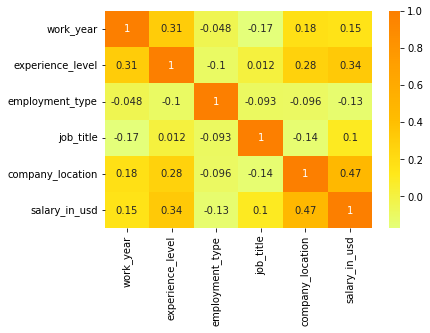

In [175]:
import seaborn as sns #Visualization
corr=ds_salary_new_important.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

le tableau precedent nous dit qu'il n'y a aucune correlation entre ces variables

**15. Développer un modèle prédictif (une régression) afin de prévoir le salaire d’une catégorie des
data scientistes en 2025.***

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [187]:
ds_salary_new_important.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'company_location', 'salary_in_usd'],
      dtype='object')

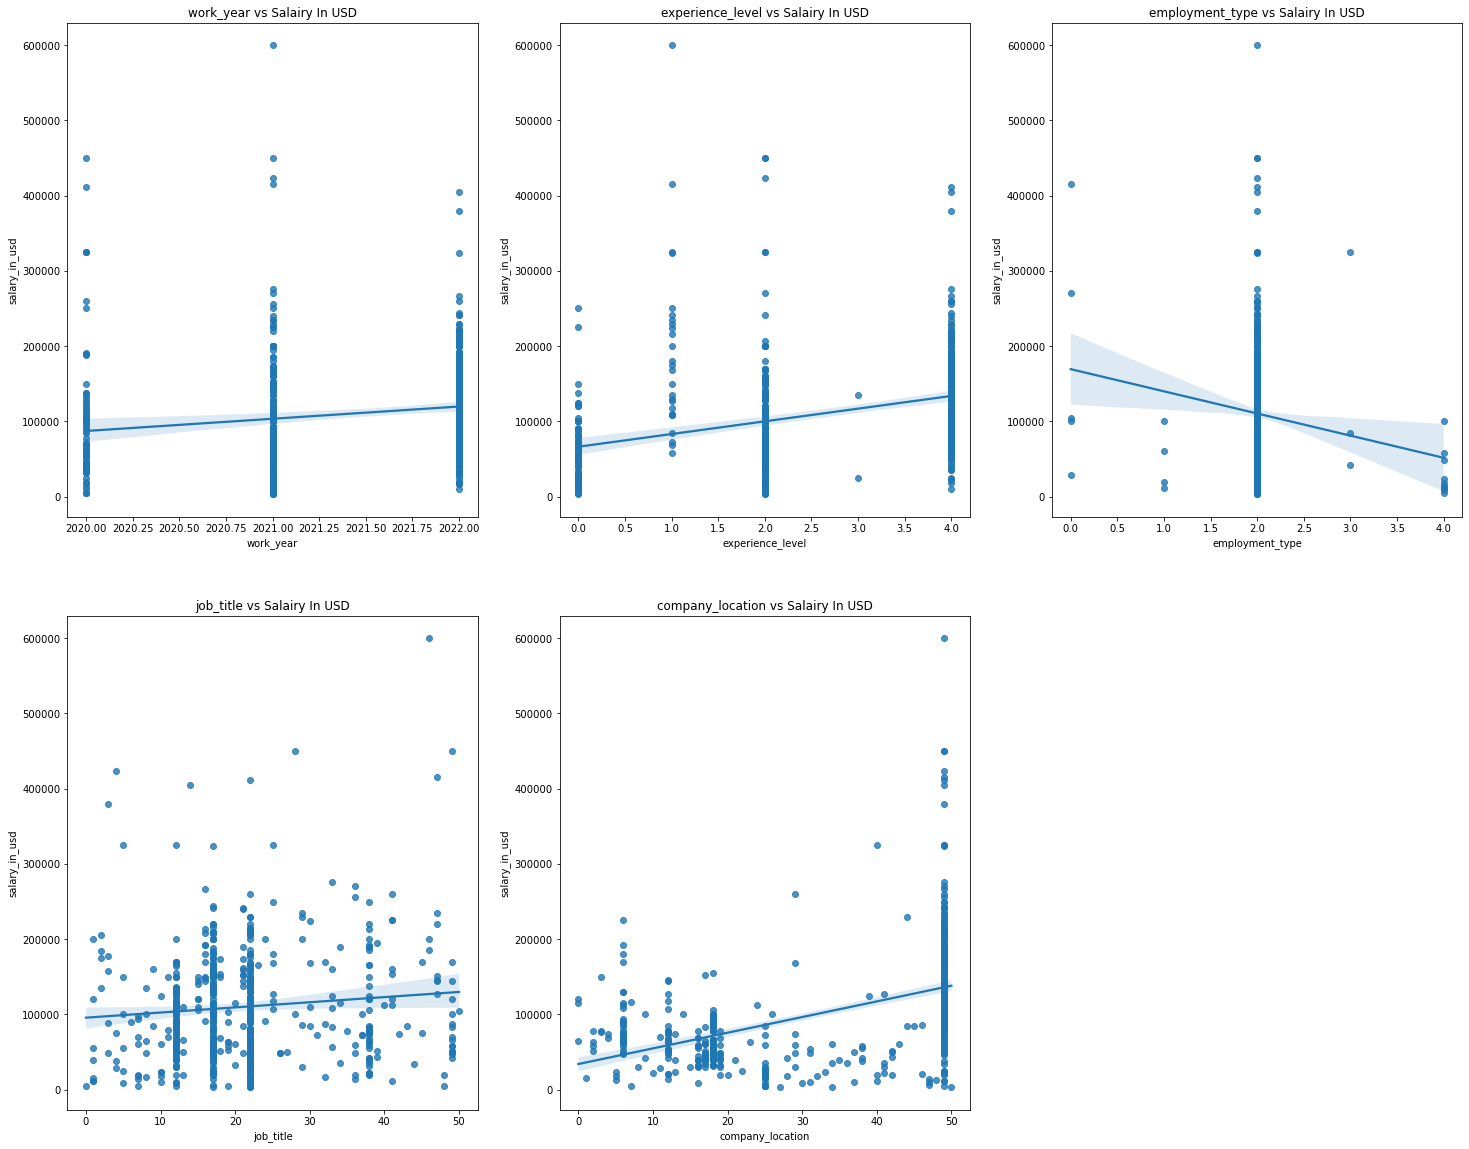

In [203]:
#plt.figure(figsize = (15,10))
cols=['work_year', 'experience_level', 'employment_type', 'job_title','company_location']
plt.figure(figsize=(25, 20))
for i, col in enumerate(cols):
    plt.subplot(2,3  , i+1)
    sns.regplot(x=col, y='salary_in_usd', data=ds_salary_new_important)
    plt.title("%s vs Salairy In USD" %(col))

    

La visualisation des valeurs et la tableau des correlations à la question 13 prouvent qu'il n'y a aucune correlation entre les variables independantes et la variable dependante<br>
Sans Correlation entre les variables dependantes et la variable independante, nous ne pouvons etablir un modele de regression efficace.